In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

MODEL_SLUG = "DMC-1200m-shortTest-06-12-2023_17:59"

FILE_PATH = f"./logs/{MODEL_SLUG}.csv"
episodes = pd.read_csv(FILE_PATH)

Text(0.5, 0, 'Episode')

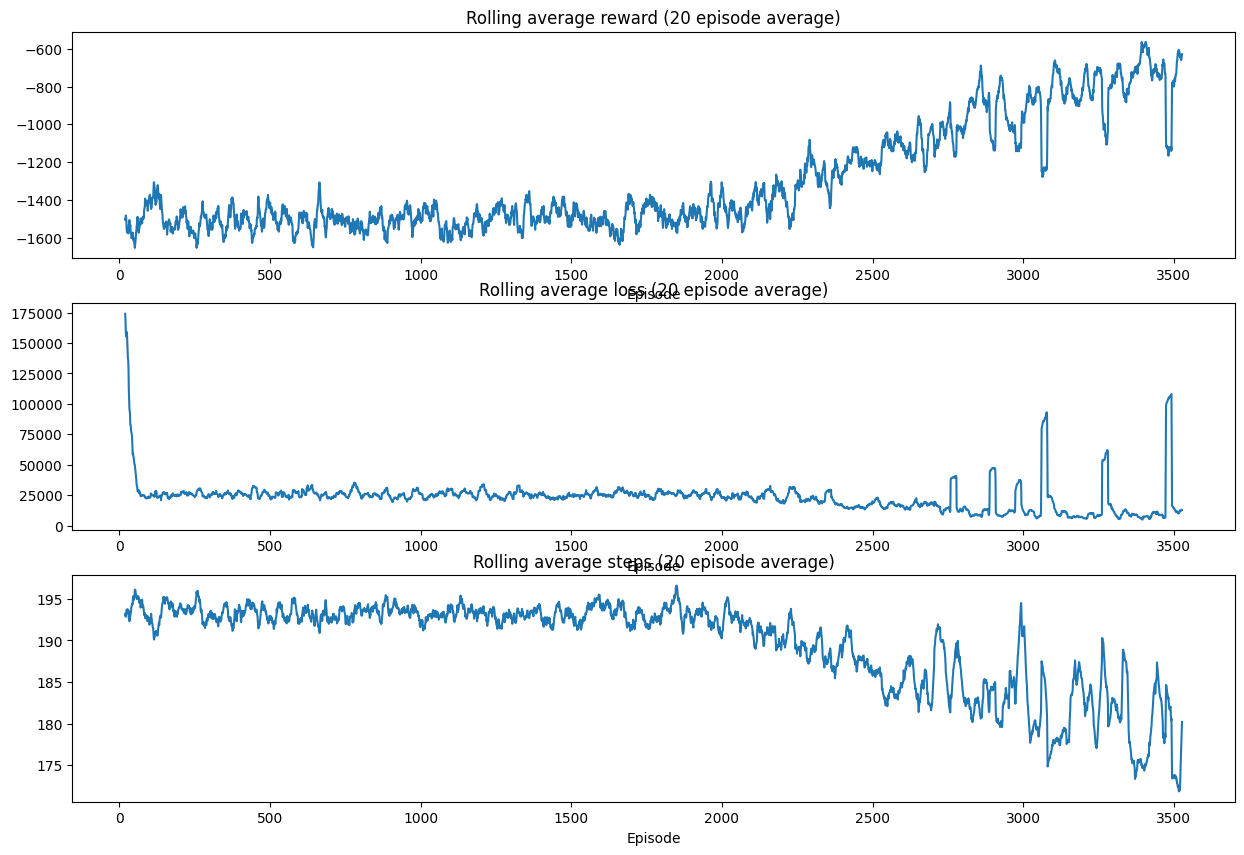

In [199]:
plt.rcParams['figure.figsize'] = [15, 10]

fig, axs = plt.subplots(3, 1)

rolling_average = 20

# Create a rolling average of the total reward per episode``
episodes['rolling_reward'] = episodes['reward'].rolling(rolling_average).mean()

axs[0].plot(episodes['episode'], episodes['rolling_reward'])
axs[0].set_title(f'Rolling average reward ({rolling_average} episode average)')
axs[0].set_xlabel('Episode')

# ---------------------------------------------

episodes['rolling_loss'] = episodes['loss'].rolling(rolling_average).mean()

axs[1].plot(episodes['episode'], episodes['rolling_loss'])
axs[1].set_title(f'Rolling average loss ({rolling_average} episode average)')
axs[1].set_xlabel('Episode')

episodes['rolling_steps'] = episodes['steps'].rolling(rolling_average).mean()

axs[2].plot(episodes['episode'], episodes['rolling_steps'])
axs[2].set_title(f'Rolling average steps ({rolling_average} episode average)')
axs[2].set_xlabel('Episode')
